# XGBoost Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import xgboost as xgb
from xgboost import plot_tree

# Load Data

In [2]:
# Read data:
data = pd.read_parquet("data/regression/insurance_preprocessed.parquet")

# Test/train Split

In [3]:
# Test/Train Split:
X = data.drop(["charges"], axis = 1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

# Fit Model

In [4]:
pipe = Pipeline([("regressor", xgb.XGBRegressor(objective="reg:linear"))])
param_grid = {
    "regressor__max_depth": [1, 2, 4],
    "regressor__n_estimators": range(10, 200, 10),
    "regressor__eta": np.arange(0.1, 1, 0.01)
}
grid_search = RandomizedSearchCV(pipe, param_grid, cv = 5, verbose = 1, n_jobs = -1, n_iter = 1000)
grid_search.fit(X_train, y_train)
print("Best Param: ", grid_search.best_params_)
model = grid_search.best_estimator_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[20:11:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Best Param:  {'regressor__n_estimators': 20, 'regressor__max_depth': 2, 'regressor__eta': 0.24999999999999992}


# Model Evaluation

In [5]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 20587654.95112311
RMSE: 4537.362113731183
R2 Score: 0.8736782172598809
MAE: 2579.517794840746
MAPE: 0.3025046418245083


# Visualize Model

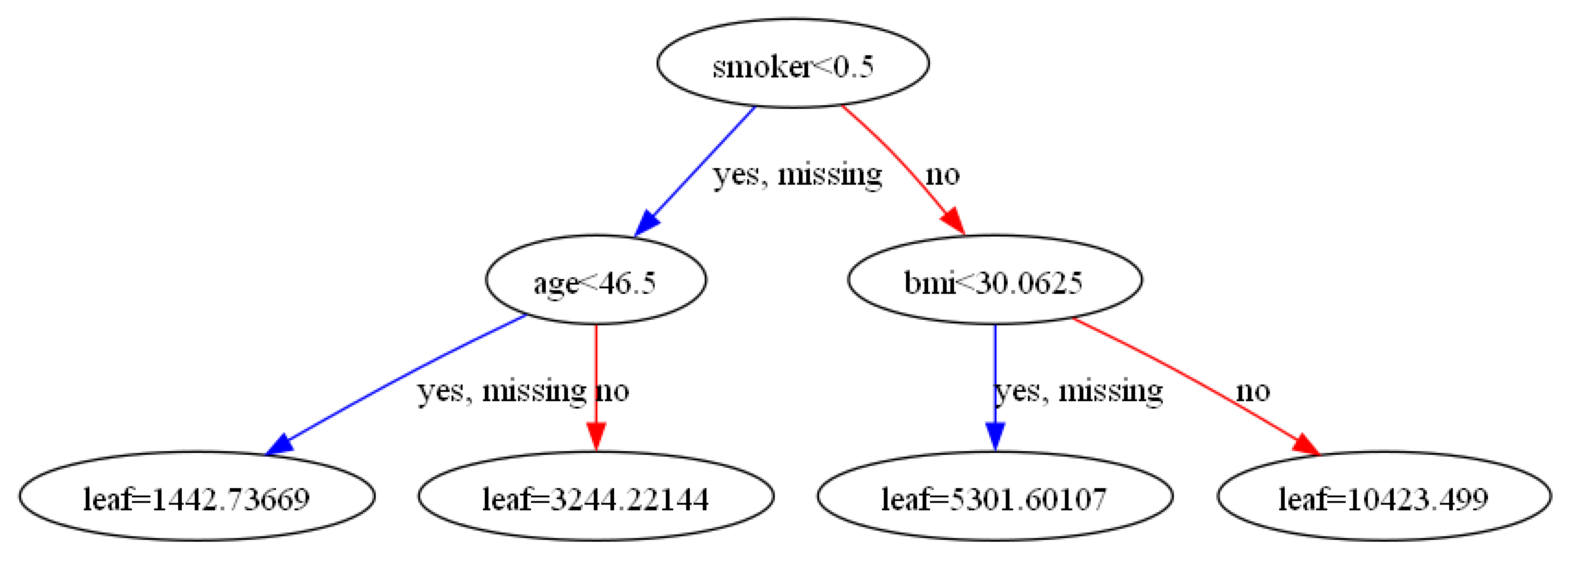

In [6]:
# Plot single tree:
m = model.named_steps["regressor"]
fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(m, num_trees = 0, ax = ax)
plt.show()